In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
#dataset
automobile_df = pd.read_csv("../bases/auto-mpg.csv", sep = ",")

# Ver 5 registros aleatorios
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
178,23.0,4,120.0,88,2957,17.0,75,2,peugeot 504
31,25.0,4,113.0,95,2228,14.0,71,3,toyota corona
214,13.0,8,302.0,130,3870,15.0,76,1,ford f108
103,11.0,8,400.0,150,4997,14.0,73,1,chevrolet impala
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst


In [3]:
#shape
automobile_df.shape 

(398, 9)

In [4]:
#Info
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
#Preparando os dados
automobile_df = automobile_df.replace('?', np.nan)
automobile_df = automobile_df.dropna()
automobile_df.shape

(392, 9)

In [6]:
#Eliminamos colunas
automobile_df.drop(['origin', 'car name'], axis=1, inplace=True)

In [7]:
#registros aleatorios
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
107,18.0,6,232.0,100,2789,15.0,73
256,20.5,6,225.0,100,3430,17.2,78
381,36.0,4,107.0,75,2205,14.5,82
251,20.2,8,302.0,139,3570,12.8,78
350,34.7,4,105.0,63,2215,14.9,81


In [8]:
#Info
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 24.5+ KB


In [8]:
#Covertemos o formato de ‘model year’ a ano completo
automobile_df['model year'] = '19' + automobile_df['model year'].astype(str)

In [9]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
266,30.0,4,98.0,68,2155,16.5,1978
120,19.0,4,121.0,112,2868,15.5,1973
8,14.0,8,455.0,225,4425,10.0,1970
383,38.0,4,91.0,67,1965,15.0,1982
86,14.0,8,304.0,150,3672,11.5,1973


In [10]:
#Criando a coluna de idade
automobile_df['age'] = datetime.datetime.now().year - pd.to_numeric(automobile_df['model year'])

In [11]:
#Eliminamos model year
automobile_df.drop(['model year'], axis=1, inplace=True)

In [12]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
303,31.8,4,85.0,65,2020,19.2,45
172,25.0,4,90.0,71,2223,16.5,49
331,33.8,4,97.0,67,2145,18.0,44
104,12.0,8,400.0,167,4906,12.5,51
327,36.4,5,121.0,67,2950,19.9,44


In [13]:
# Types
automobile_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [14]:
#Convertemos a potência em valores numéricos
automobile_df['horsepower'] = pd.to_numeric(automobile_df['horsepower'], errors='coerce')

In [15]:
#Análise de dados estatísticos
automobile_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,48.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,42.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,45.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,48.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,51.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,54.000000


Text(0, 0.5, 'Milhas por galão')

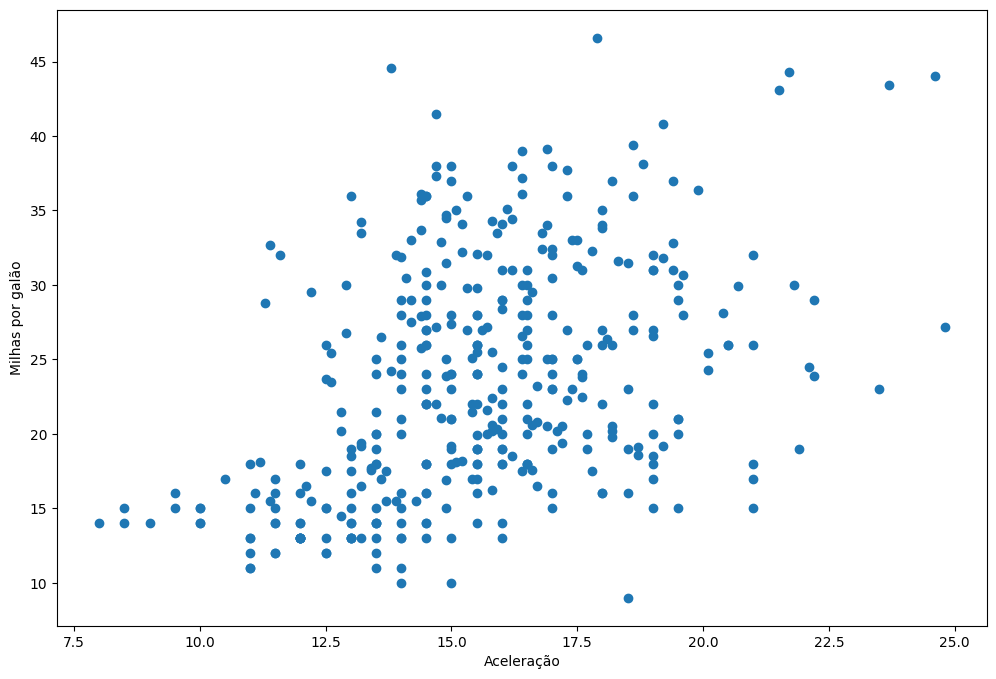

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
# MPG, or miles per gallon
plt.scatter(automobile_df['acceleration'], automobile_df['mpg'])

plt.xlabel('Aceleração')
plt.ylabel('Milhas por galão')

Text(0, 0.5, 'Milhas por galão')

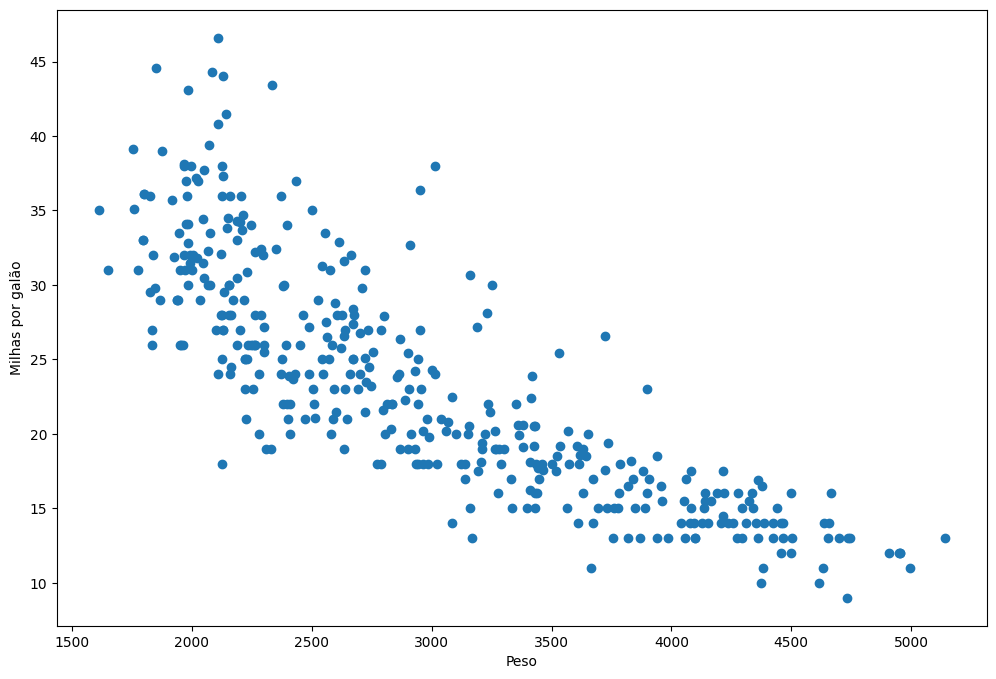

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['weight'], automobile_df['mpg'])

plt.xlabel('Peso')
plt.ylabel('Milhas por galão')

Text(0, 0.5, 'Milhas por galão')

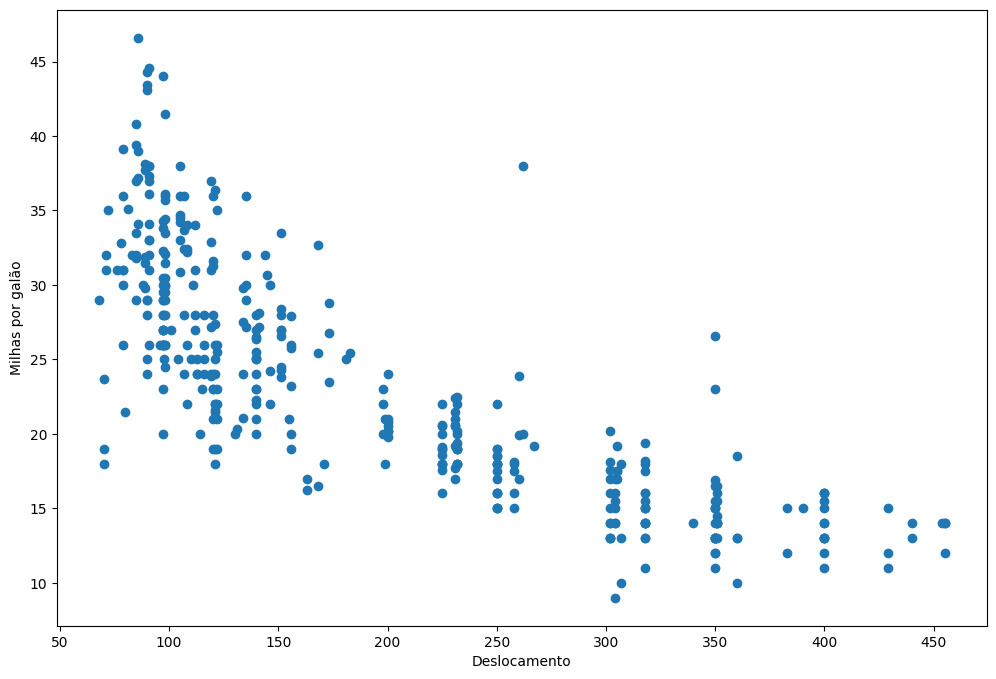

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['displacement'], automobile_df['mpg'])

plt.xlabel('Deslocamento')
plt.ylabel('Milhas por galão')

Text(0, 0.5, 'Milhas por galão')

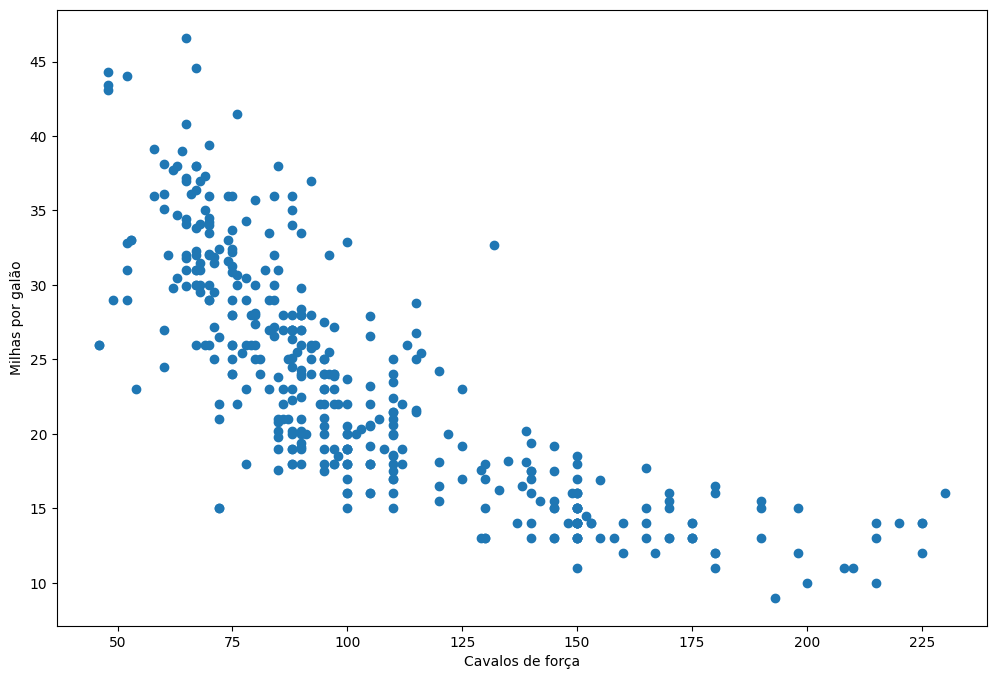

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['horsepower'], automobile_df['mpg'])

plt.xlabel('Cavalos de força')
plt.ylabel('Milhas por galão')

In [21]:
#Correlções
automobile_corr = automobile_df.corr()
automobile_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


<Axes: >

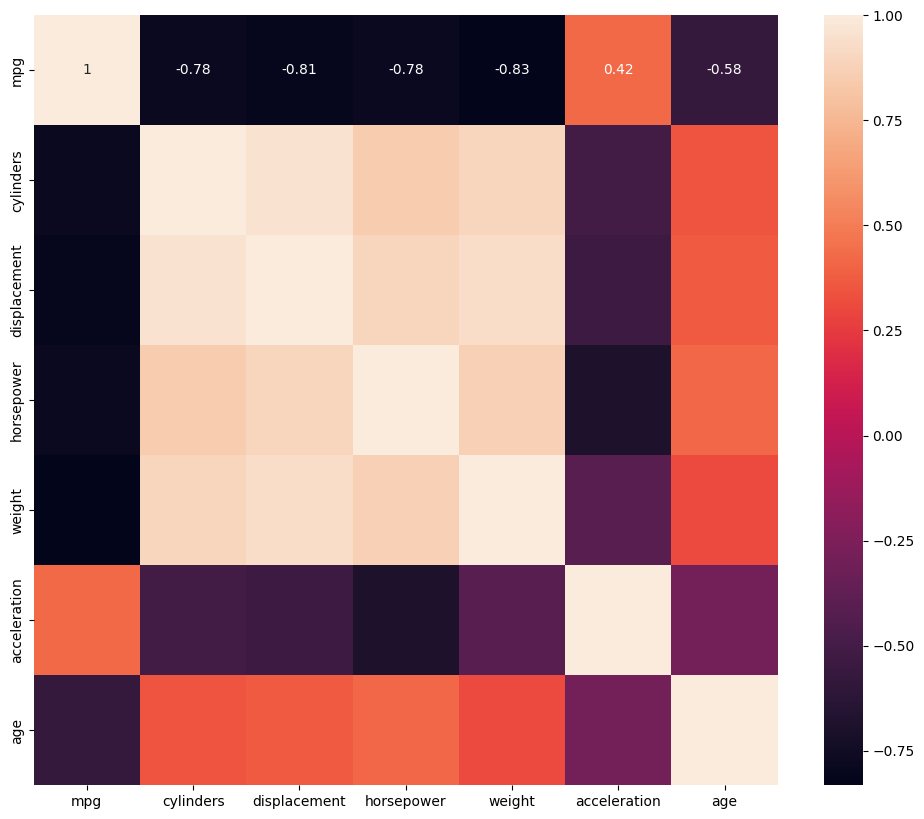

In [22]:
#Matriz de Correlações
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(automobile_corr, annot=True)

In [23]:
#Regresion Linear
from sklearn.model_selection import train_test_split

X = automobile_df[['horsepower']]
Y = automobile_df['mpg']

#Train e Test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [24]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(x_train, y_train)

In [42]:
#print('Pontuação de treinamento: ', linear_model.score(x_train, y_train))

In [25]:
#Predições
y_pred = linear_model.predict(x_test)

In [26]:
from sklearn.metrics import r2_score

print('Testing: ', r2_score(y_test, y_pred))

Testing:  0.6061355446881397


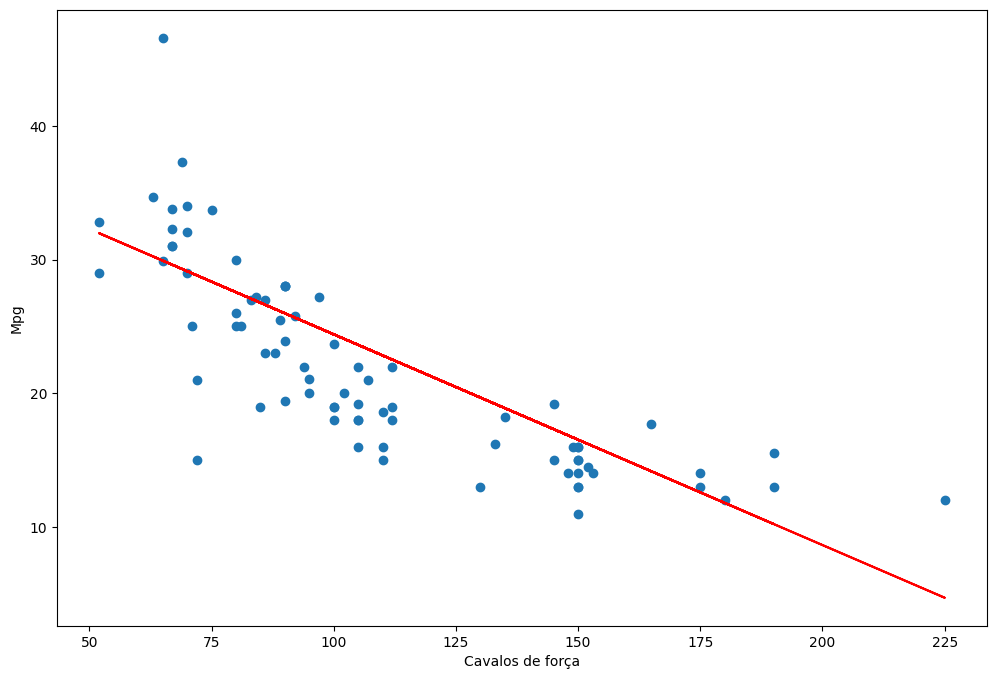

In [27]:
#Plot do ajuste 
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Cavalos de força')
plt.ylabel('Mpg')
plt.show()

In [28]:
#Regresion lineal con age
X = automobile_df[['age']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression().fit(x_train, y_train)

print('Pontuação de treinamento: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

print('Testing: ', r2_score(y_test, y_pred))

Pontuação de treinamento:  0.341843583985174
Testing:  0.31980711258164096


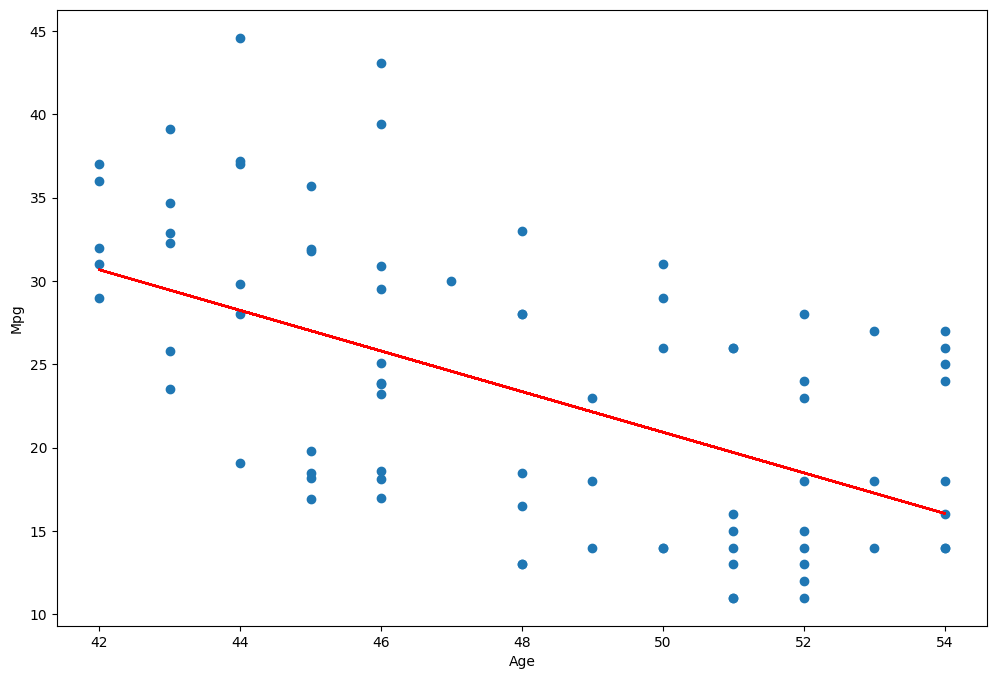

In [29]:
#Plots
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Age')
plt.ylabel('Mpg')
plt.show()

In [30]:
#Regressão linear
X = automobile_df[['displacement', 'horsepower', 'weight']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [31]:
#Modelo
linear_model = LinearRegression().fit(x_train, y_train)

In [32]:
#print('Training score: ', linear_model.score(x_train, y_train))

In [33]:
#Coeficientes
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

horsepower     -0.043226
weight         -0.005578
displacement   -0.003696
dtype: float64


In [34]:
#Predições
y_pred = linear_model.predict(x_test)

In [35]:
print('Testing', r2_score(y_test, y_pred))

Testing 0.7316287706420238


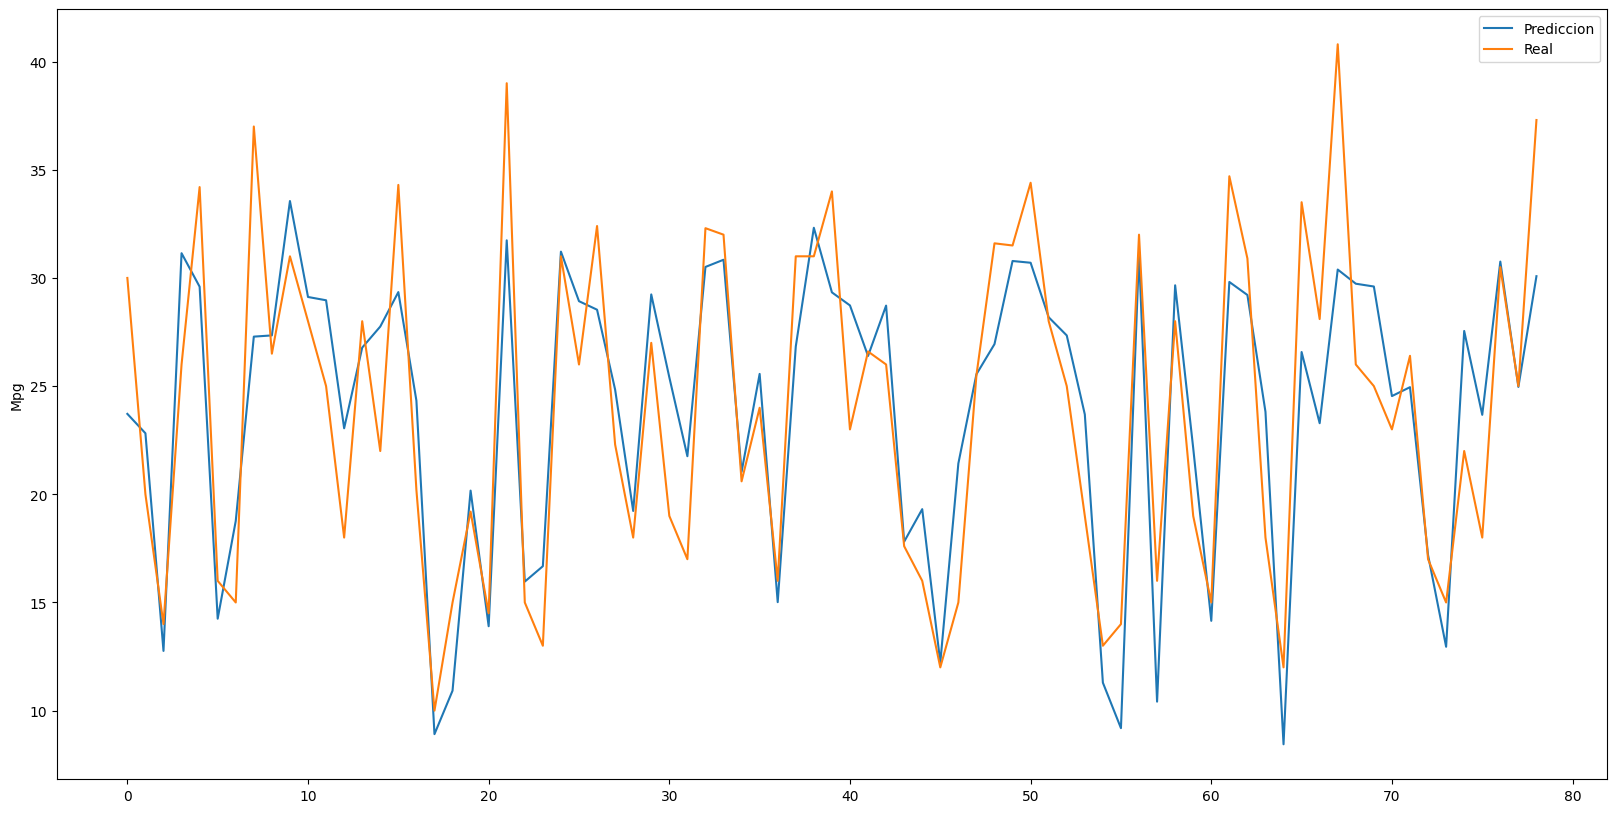

In [36]:
#Plots
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Prediccion')
plt.plot(y_test.values, label='Real')

plt.ylabel('Mpg')

plt.legend()
plt.show()

In [41]:
#Validação
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.340906248278008
Mean Squared Error: 19.87753272906326
Root Mean Squared Error: 4.458422672769291
